In [1]:
# if plotting does not work, change it into %matplotlib inline
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from utilities import display_array, normalise_clip
import deepdish as dd
from scipy.stats import zscore

# Loading the data

In [3]:
# load the imaging file from the folder "whole brain"
fps = 1.5
data_path = r"/Users/chenchen/Documents/MSNE/Semester4/2.Large_Scale_Modeling/msne-lsmlsda-2019/your-code/project3_zhenchen/exercise/week11_imaging_analysis/whole_brain/traces_better_deconvolved.h5"
traces = dd.io.load(data_path) 

## Plotting the traces

/Users/chenchen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  
/Users/chenchen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


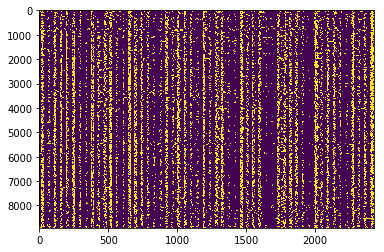

In [31]:
# Normalize the traces and plot them below as an image. 
tr_mean=np.mean(traces,axis=1)
tr_var=np.var(traces,axis=1)


traces_norm=(traces-tr_mean[:,None])/tr_var[:,None]
plt.imshow(traces_norm,aspect='auto', vmin=0, vmax=1)
plt.show()

# Averaging the traces over trials

In [50]:
# In the experiment from which the data was collected, there were 9 trials, the duration of each trial is 180 seconds. 
# To get a cleaner signal, average the traces over the 9 trials. Remember the sampling frequency of the data (1.5 Hz).
num_trials = 9
trace_trial=np.zeros((9,8917,270))
for i in range(num_trials):
    trace_trial[i,:,:]=traces_norm[:,i*270:(i+1)*270]


<function matplotlib.pyplot.show(*args, **kw)>

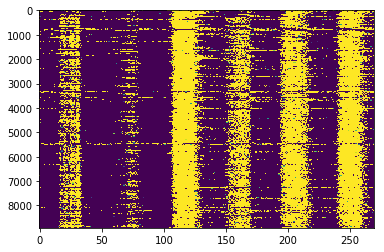

In [56]:
tr_mean=np.mean(trace_trial,axis=0)
tr_trialclean=trace_trial - tr_mean[None,:,:]
trace_clean=np.zeros(traces.shape)
for i in range(num_trials):
    trace_clean[:,i:i+270]=tr_trialclean[i,:,:]
    
plt.imshow(tr_mean,aspect='auto', vmin=0, vmax=1)
plt.show

In [55]:
print(trace_trial.shape)

(9, 8917, 270)


You should get something like:

![](fig1_avg_traces.png)

# Dimensionality reduction and clustering 

## Dimensionality reduction (using PCA)

In [57]:
from sklearn.decomposition import PCA
import pandas as pd

In [64]:
# Run PCA over the average traces
ave_traces=tr_mean
print(ave_traces.shape)
pca=PCA(n_components=None,svd_solver='full')

pca.fit(trace_trial.mean(axis=0))

(8917, 270)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
# Plot the first 3 PCs


![](fig2_PCs.png)

## Explained variance plot

In [ ]:
# To choose the number of PCs for the transformation of the data, create an explained variance plot.
# In this plot you will see the precentage of variance explained by each PC. Plot this only for the first 20 PCs. 


![](fig3_exp_var.png)

## Transformation of the data

In [ ]:
# Show the data in the PC space. 
num_pcs_to_use = 2


# Show the loading of the components in brain coordinates

Load the coords.h5 file and make a scatter plot in the x-y plane and x-z plane (coordinates 1 and 2 and 1 and 0 respectively)
showing the loading of the principal components (color-code the loading of principal components per cell)

You should get somehting like this for the 2nd principal component:
    
![](pc_2.png)

Some jitter in the z coordinate has been added to show better the spatial distribution, otherwise the second plot would be cluttered in 30 layers.

Use the behavior and stimulus log to consider what the principal components could mean in terms of the stimulus and the behavior of the fish.

## Clustering the transformed traces (using K means)

In [ ]:
from sklearn.cluster import KMeans

# Choose number of clusters 

# Cluster the data

# How many neurons are there in each clusters? Are the clusters meaningful?
